# Part 1

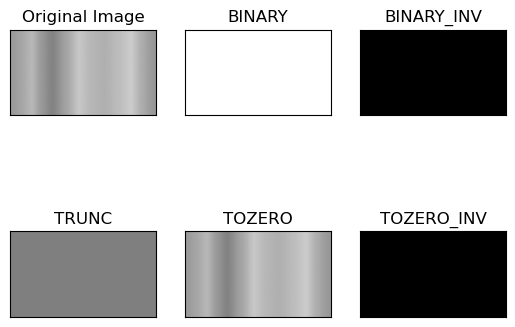

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('gradient.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

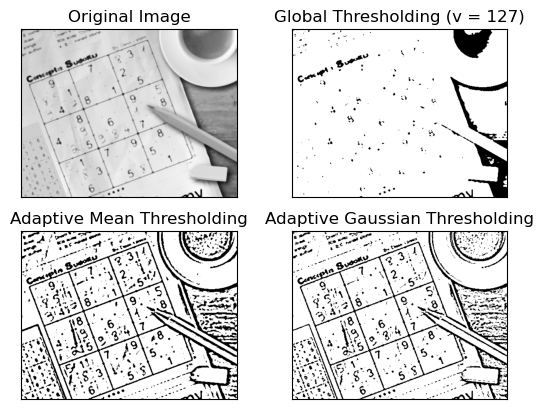

In [2]:
img = cv.imread('sudoku.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

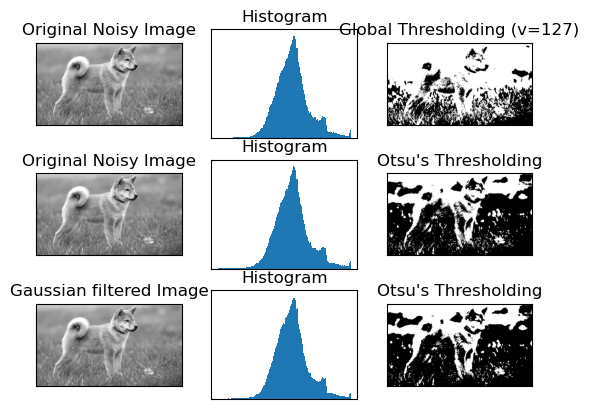

In [3]:
img = cv.imread('chien.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
img, 0, th2,
blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
'Original Noisy Image','Histogram',"Otsu's Thresholding",
'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [4]:
blur = cv.GaussianBlur(img,(5,5),0)
# find normalized_histogram, and its cumulative distribution function
hist = cv.calcHist([blur],[0],None,[256],[0,256])
hist_norm = hist.ravel()/hist.sum()
Q = hist_norm.cumsum()
bins = np.arange(256)
fn_min = np.inf
thresh = -1
for i in range(1,256):
    p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
    q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
    if q1 < 1.e-6 or q2 < 1.e-6:
        continue
    b1,b2 = np.hsplit(bins,[i]) # weights
    # finding means and variances
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
    # calculates the minimization function
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        thresh = i
# find otsu's threshold value with OpenCV function
ret, otsu = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
print( "{} {}".format(thresh,ret) )

155 150.0


# Part 2
## A - Simple thresholding: 
## Adjust Threshold Values:

Please enter a value for the threshold: 
220
Threshold value chosen 220.0


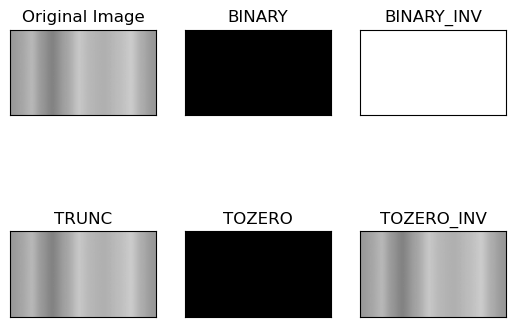

In [5]:
#Each time we will check if the file can be opened or not
img = cv.imread('gradient.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

#User's input
print('Please enter a value for the threshold: ')
threshold = float(input())
print('Threshold value chosen', threshold)

ret,thresh1 = cv.threshold(img,threshold,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,threshold,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,threshold,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,threshold,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,threshold,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Apply Blur:

Please enter a value for the threshold: 
140
Threshold value chosen 140.0


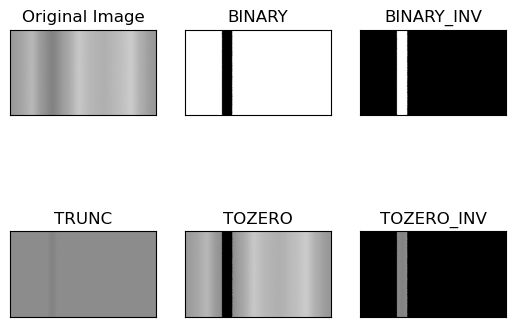

In [6]:
img = cv.imread('gradient.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

print('Please enter a value for the threshold: ')
threshold = float(input())
print('Threshold value chosen', threshold)

#Here we just apply a simple gaussian blur before the threshold
img = cv.GaussianBlur(img, (5,5), 0)
ret,thresh1 = cv.threshold(img,threshold,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,threshold,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,threshold,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,threshold,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,threshold,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Adaptive Thresholding:

Please enter a value for the threshold: 
12
Threshold value chosen 12.0


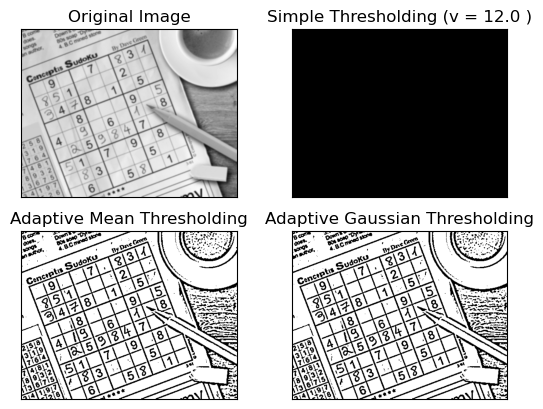

In [7]:
img = cv.imread('sudoku.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

print('Please enter a value for the threshold: ')
threshold = float(input())
print('Threshold value chosen', threshold)


img = cv.GaussianBlur(img, (5,5), 0)
#As before we apply a simple thresholding
ret,th1 = cv.threshold(img,threshold,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,
cv.THRESH_BINARY, 11, 2)
th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,
cv.THRESH_BINARY, 11, 2)
titles = ['Original Image', 'Simple Thresholding (v = ' + str(threshold) + ' )',
          'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']

images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Display using OpenCV:

In [8]:
img = cv.imread('gradient.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

print('Please enter a value for the threshold: ')
threshold = float(input())
print('Threshold value chosen', threshold)

ret, thresh1 = cv.threshold(img, threshold, 255, cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(img, threshold, 255, cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold(img, threshold, 255, cv.THRESH_TRUNC)
ret, thresh4 = cv.threshold(img, threshold, 255, cv.THRESH_TOZERO)
ret, thresh5 = cv.threshold(img, threshold, 255, cv.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY ', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

#a simple loop to display using openCv instead of matplotlib
for i in range(6):
    cv.imshow(titles[i], images[i])

cv.waitKey(0)
cv.destroyAllWindows()


Please enter a value for the threshold: 
96
Threshold value chosen 96.0


## Save Processed Images:

In [9]:
img = cv.imread('gradient.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

print('Please enter a value for the threshold: ')
threshold = float(input())
print('Threshold value chosen', threshold)

ret, thresh1 = cv.threshold(img, threshold, 255, cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(img, threshold, 255, cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold(img, threshold, 255, cv.THRESH_TRUNC)
ret, thresh4 = cv.threshold(img, threshold, 255, cv.THRESH_TOZERO)
ret, thresh5 = cv.threshold(img, threshold, 255, cv.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

cv.imwrite('BINARY.png', thresh1)
#we will only save one image here but we can save the 6 images with : 
"""
for i in range(6):
    cv.imshow(titles[i], images[i])
    cv.imwrite('thresholded_image' + str(i) + '.png', images[i])
"""

#as before, we also show the images
for i in range(6):
    cv.imshow(titles[i], images[i])

cv.waitKey(0)
cv.destroyAllWindows()


Please enter a value for the threshold: 
180
Threshold value chosen 180.0


## Utilize Otsu's Thresholding:

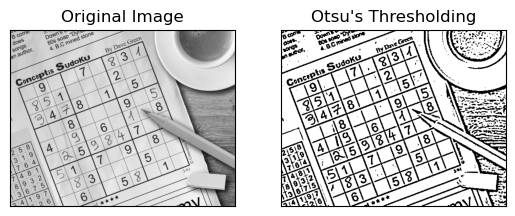

In [10]:
img = cv.imread('sudoku.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

# Otsu's thresholding
ret,th = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# Plot the original and Otsu thresholded images
plt.subplot(1, 2, 1), plt.imshow(img, 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(th2, 'gray')
plt.title("Otsu's Thresholding"), plt.xticks([]), plt.yticks([])

plt.show()

## Incorporate Other Image Processing Techniques:

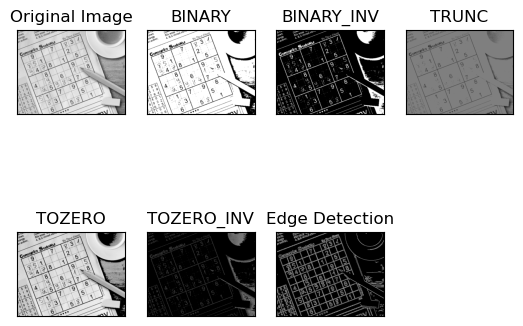

In [11]:
img = cv.imread('sudoku.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

ret, thresh1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold(img, 127, 255, cv.THRESH_TRUNC)
ret, thresh4 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO)
ret, thresh5 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO_INV)

# Now we apply edge detection
edges = cv.Canny(img, 100, 200)  

# Now with Hough Transform for line detection
lines = cv.HoughLines(edges, 1, np.pi / 180, 100)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV', 'Edge Detection', 'Hough Lines']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5, edges]

#Finally we display the images
for i in range(7):
    plt.subplot(2, 4, i + 1), plt.imshow(images[i], 'gray', vmin=0, vmax=255)
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

## B- Adaptive Thresholding:
## Blurring Techniques:

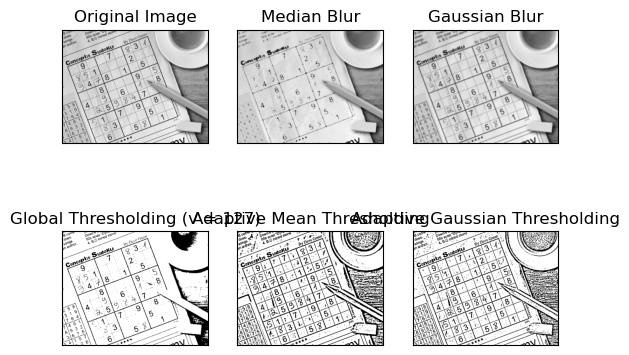

In [12]:
img = cv.imread('sudoku.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

#With a median blur
median_blur = cv.medianBlur(img, 5)

#And a Gaussian blur
gaussian_blur = cv.GaussianBlur(img, (5, 5), 0)

ret, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

titles = [
    'Original Image', 'Median Blur', 'Gaussian Blur',
    'Global Thresholding (v = 127)',
    'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding'
]

#we display all :
images = [img, median_blur, gaussian_blur, th1, th2, th3]

for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

## Variable Threshold Values:

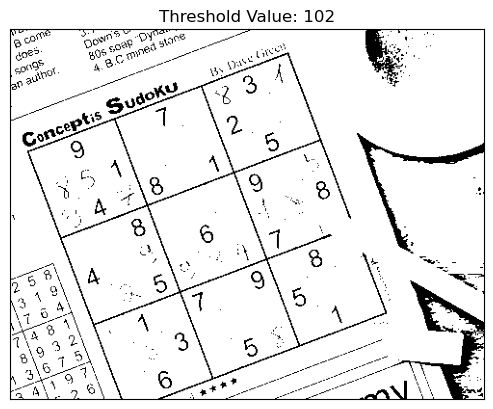

In [13]:
img = cv.imread('sudoku.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

# Create a function to update the threshold
def update_threshold(value):
    ret, thresh = cv.threshold(img, value, 255, cv.THRESH_BINARY)
    plt.imshow(thresh, 'gray')
    plt.title('Threshold Value: {}'.format(value))
    plt.xticks([]), plt.yticks([])

cv.namedWindow('Threshold Adjustment')
cv.createTrackbar('Threshold', 'Threshold Adjustment', 0, 255, update_threshold)

initial_threshold = 127
cv.setTrackbarPos('Threshold', 'Threshold Adjustment', initial_threshold)

update_threshold(initial_threshold)

cv.waitKey(0)
cv.destroyAllWindows()
#here the window will close then we see a result

## Block Size & C for Adaptive Thresholding:

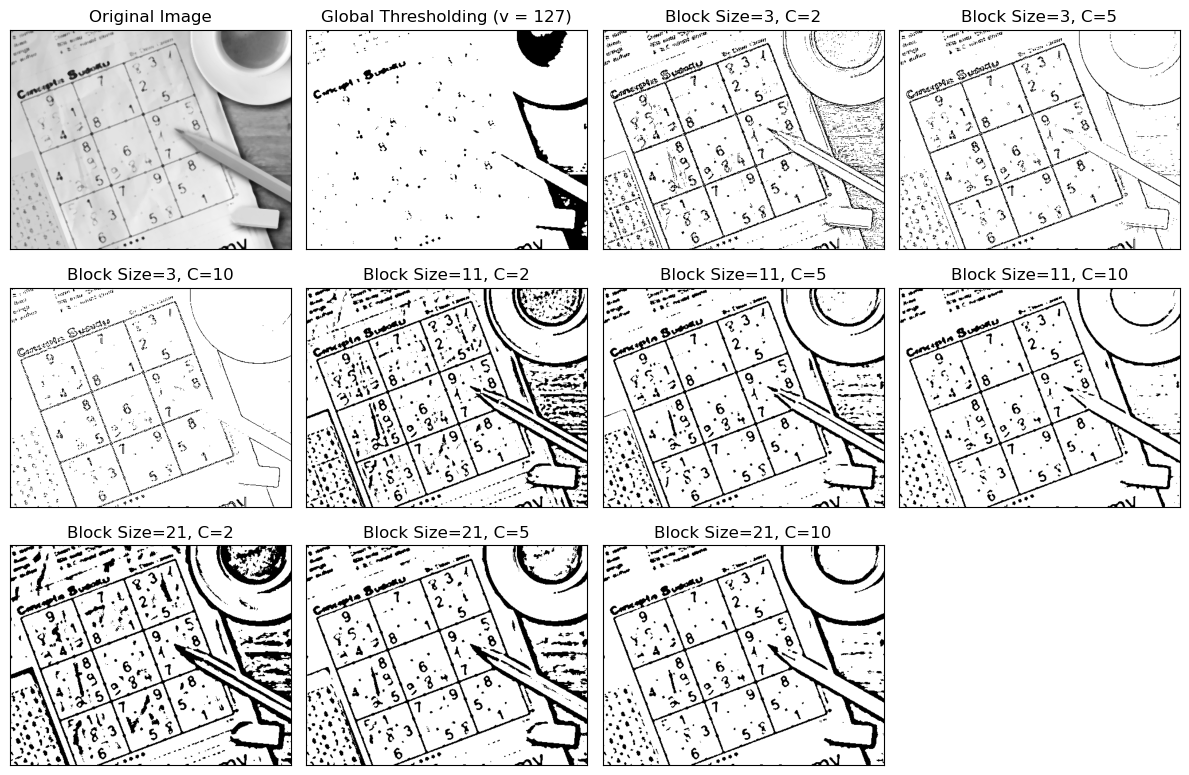

In [14]:
img = cv.imread('sudoku.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

img = cv.medianBlur(img, 5)
ret, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

# We will do with random values
block_sizes = [3, 11, 21]
constants_C = [2, 5, 10]

plt.figure(figsize=(12, 8))

plt.subplot(3, 4, 1)
plt.imshow(img, 'gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(3, 4, 2)
plt.imshow(th1, 'gray')
plt.title('Global Thresholding (v = 127)')
plt.xticks([]), plt.yticks([])

for i, block_size in enumerate(block_sizes):
    for j, C in enumerate(constants_C):
        # let's apply adaptive thresholding, then plot results
        th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, block_size, C)
        subplot_index = i * len(constants_C) + j + 3
        plt.subplot(3, 4, subplot_index)
        plt.imshow(th2, 'gray')
        plt.title(f'Block Size={block_size}, C={C}')
        plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

## Thresholding Types:

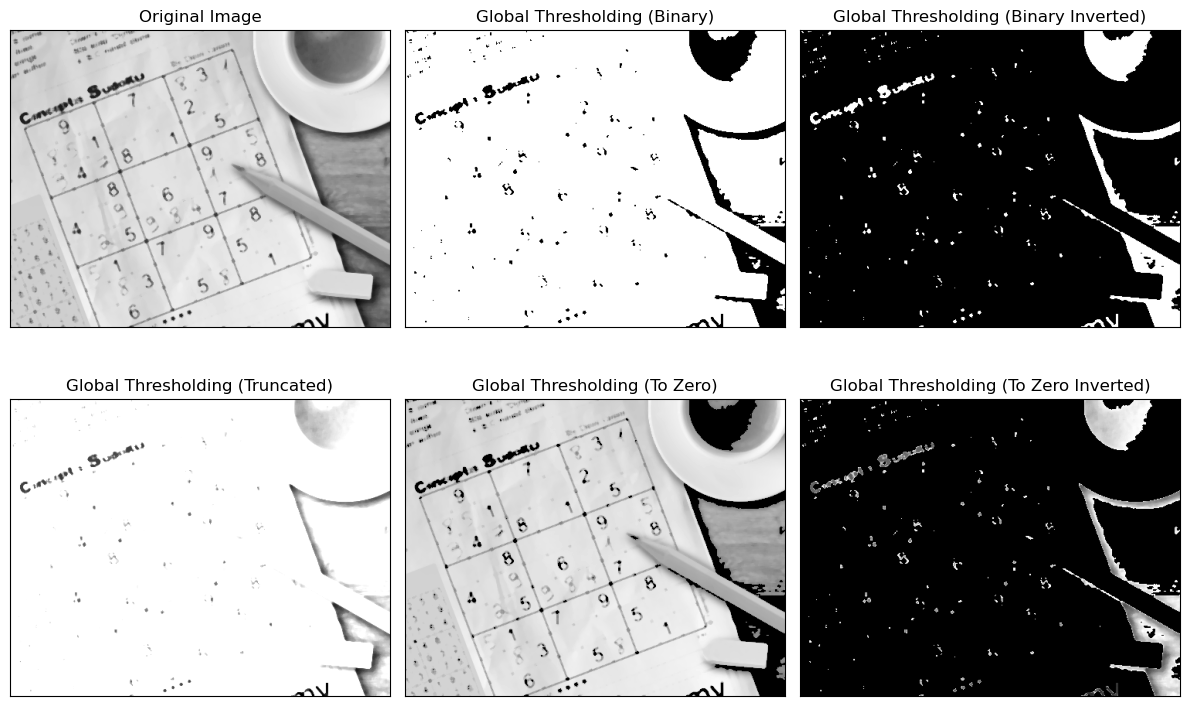

In [15]:
img = cv.imread('sudoku.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

img = cv.medianBlur(img, 5)

# Applying different thresholding methods
ret, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
ret, th2 = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)
ret, th3 = cv.threshold(img, 127, 255, cv.THRESH_TRUNC)
ret, th4 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO)
ret, th5 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO_INV)

titles = [
    'Original Image', 'Global Thresholding (Binary)',
    'Global Thresholding (Binary Inverted)',
    'Global Thresholding (Truncated)',
    'Global Thresholding (To Zero)',
    'Global Thresholding (To Zero Inverted)'
]

images = [img, th1, th2, th3, th4, th5]

plt.figure(figsize=(12, 8))

for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


## Mathematical Morphology:

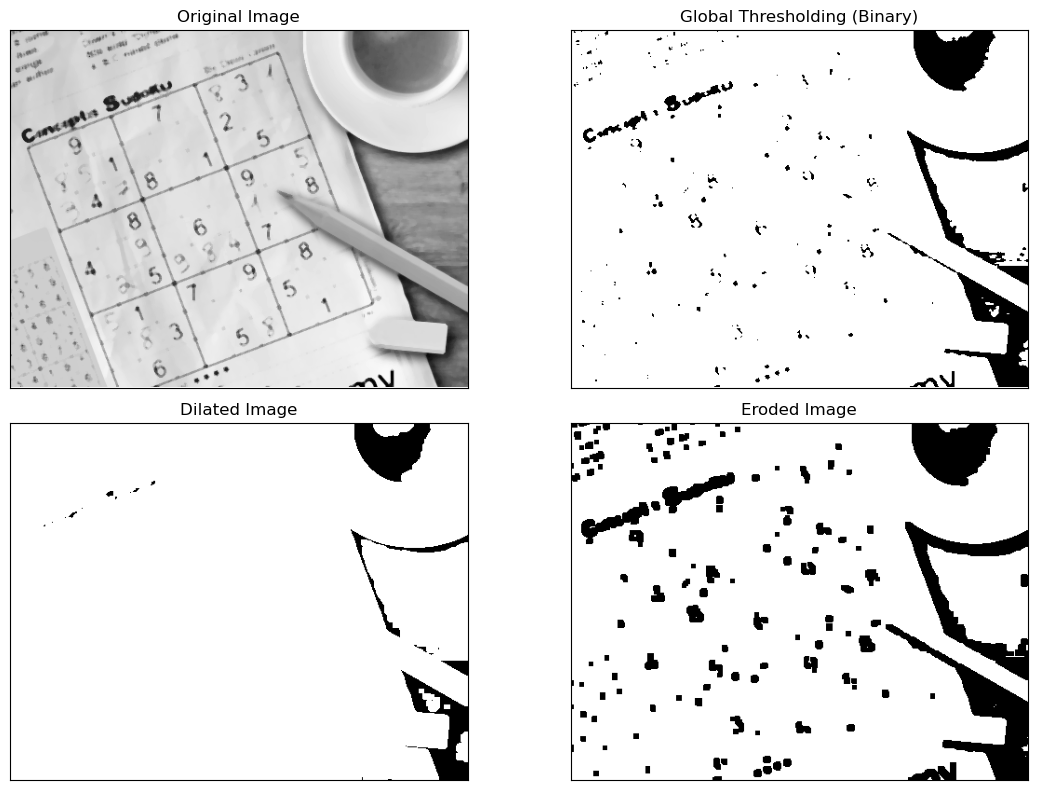

In [16]:
img = cv.imread('sudoku.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

img = cv.medianBlur(img, 5)
ret, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

# Apply dilation and erosion
kernel = np.ones((5, 5), np.uint8)
dilated = cv.dilate(th1, kernel, iterations=1)
eroded = cv.erode(th1, kernel, iterations=1)

titles = [
    'Original Image', 'Global Thresholding (Binary)',
    'Dilated Image', 'Eroded Image'
]

images = [img, th1, dilated, eroded]

plt.figure(figsize=(12, 8))

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

## Contour detection

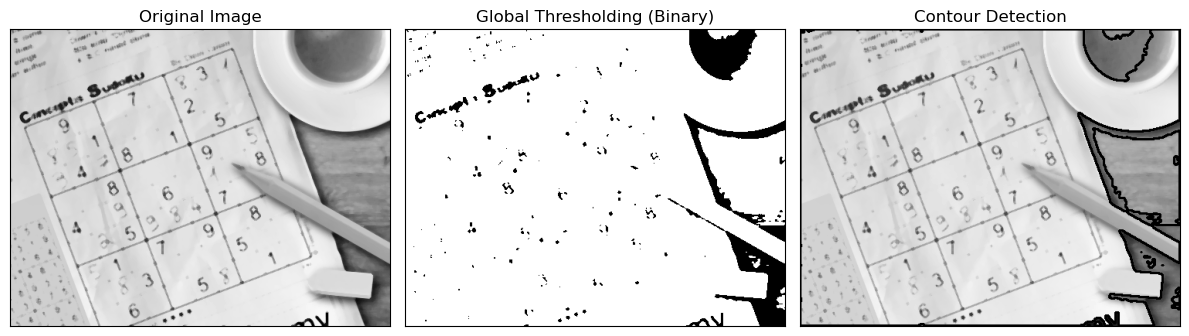

In [17]:
img = cv.imread('sudoku.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

img = cv.medianBlur(img, 5)
ret, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

# now using find contours on the image
contours, _ = cv.findContours(th1, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Draw the contours on a copy of the original image, then display
contour_image = img.copy()
cv.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

titles = [
    'Original Image', 'Global Thresholding (Binary)', 'Contour Detection'
]

images = [img, th1, contour_image]

plt.figure(figsize=(12, 8))

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

## Save Results:

In [18]:
import os



save = input("Do you want to save the images? (yes/no): ")
if save == "yes":
    folder = input("Enter the folder name to save the images: ")
    if folder:
        os.makedirs(folder, exist_ok=True)  # Create the folder if it doesn't exist
        #for each image we will associate the correct title
        for i, (image, title) in enumerate(zip(images, titles)):
            filename = f"{folder}/{title}.png"
            cv.imwrite(filename, image)
            print(f'Saved: {filename}')
    else:
        print("Folder name not provided. Images were not saved.")

Do you want to save the images? (yes/no): yes
Enter the folder name to save the images: images
Saved: images/Original Image.png
Saved: images/Global Thresholding (Binary).png
Saved: images/Contour Detection.png


## Real-time Application:

In [20]:
import cv2 as cv
import numpy as np

cap = cv.VideoCapture(0)

while (1):
    ret, frame = cap.read()

    # Apply a binary threshold to the frame
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    _, thresholded = cv.threshold(gray, 127, 255, cv.THRESH_BINARY)

    # Display the original frame and the thresholded frame
    cv.imshow('Original Frame', frame)
    cv.imshow('Thresholded Frame', thresholded)

    k = cv.waitKey(5) & 0xFF
    if k == 27:  # Press 'Esc' to exit
        break

cv.destroyAllWindows()